In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("final_data.csv", header = 0)
print("Shape of the Dataset is: ",data.shape)
data.head()


Shape of the Dataset is:  (759, 12)


,Chest(cm),Biceps(cm),Forearm(cm),Wrist(cm),Abdomen(cm),Hip(cm),Thigh(cm),Knee(cm),Ankle(cm),Height(cm),Age(yr),Weight(kg)
0,89.5,32.5,26.0,16.5,74.5,93.5,51.5,34.5,23.5,174.0,21,65.6
1,97.0,34.4,28.0,17.0,86.5,94.8,51.5,36.5,24.5,175.3,23,71.8
2,97.5,33.4,28.8,16.9,82.9,95.0,57.3,37.0,21.9,193.5,28,80.7
3,97.0,31.0,26.2,16.6,78.8,94.0,53.0,37.0,23.0,186.5,23,72.6
4,97.5,32.0,28.4,18.0,82.5,98.5,55.4,37.7,24.4,187.2,22,78.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chest(cm)    759 non-null    float64
 1   Biceps(cm)   759 non-null    float64
 2   Forearm(cm)  759 non-null    float64
 3   Wrist(cm)    759 non-null    float64
 4   Abdomen(cm)  759 non-null    float64
 5   Hip(cm)      759 non-null    float64
 6   Thigh(cm)    759 non-null    float64
 7   Knee(cm)     759 non-null    float64
 8   Ankle(cm)    759 non-null    float64
 9   Height(cm)   759 non-null    float64
 10  Age(yr)      759 non-null    int64  
 11  Weight(kg)   759 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 71.3 KB


In [4]:
data.describe()

,Chest(cm),Biceps(cm),Forearm(cm),Wrist(cm),Abdomen(cm),Hip(cm),Thigh(cm),Knee(cm),Ankle(cm),Height(cm),Age(yr),Weight(kg)
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,95.820553,31.536100,26.846377,16.805402,87.945455,97.751252,57.702503,36.995652,22.471146,173.613913,35.063241,73.147299
std,10.154763,3.915787,2.888711,1.603537,10.410070,7.006872,4.883525,2.786723,1.861397,9.269024,12.736883,14.484494
min,72.600000,22.400000,19.600000,13.000000,64.000000,78.800000,46.300000,29.000000,16.400000,147.200000,18.000000,42.000000
25%,88.000000,28.450000,24.400000,15.500000,80.500000,93.050000,54.350000,35.000000,21.300000,167.550000,24.500000,62.000000
50%,96.200000,31.400000,27.300000,17.000000,86.900000,97.100000,57.200000,36.900000,22.400000,174.000000,32.000000,72.570000
75%,103.450000,34.400000,29.000000,18.100000,94.200000,101.750000,60.600000,38.800000,23.500000,180.300000,43.000000,83.160000
max,136.200000,45.000000,34.900000,21.400000,148.100000,147.700000,87.300000,49.100000,33.900000,198.100000,81.000000,164.720000


In [5]:
data.nunique(axis=0)

Chest(cm)      330
Biceps(cm)     167
Forearm(cm)    125
Wrist(cm)       75
Abdomen(cm)    332
Hip(cm)        250
Thigh(cm)      195
Knee(cm)       130
Ankle(cm)       94
Height(cm)     190
Age(yr)         55
Weight(kg)     434
dtype: int64

# EDA


In [6]:
sns.set(style='ticks')

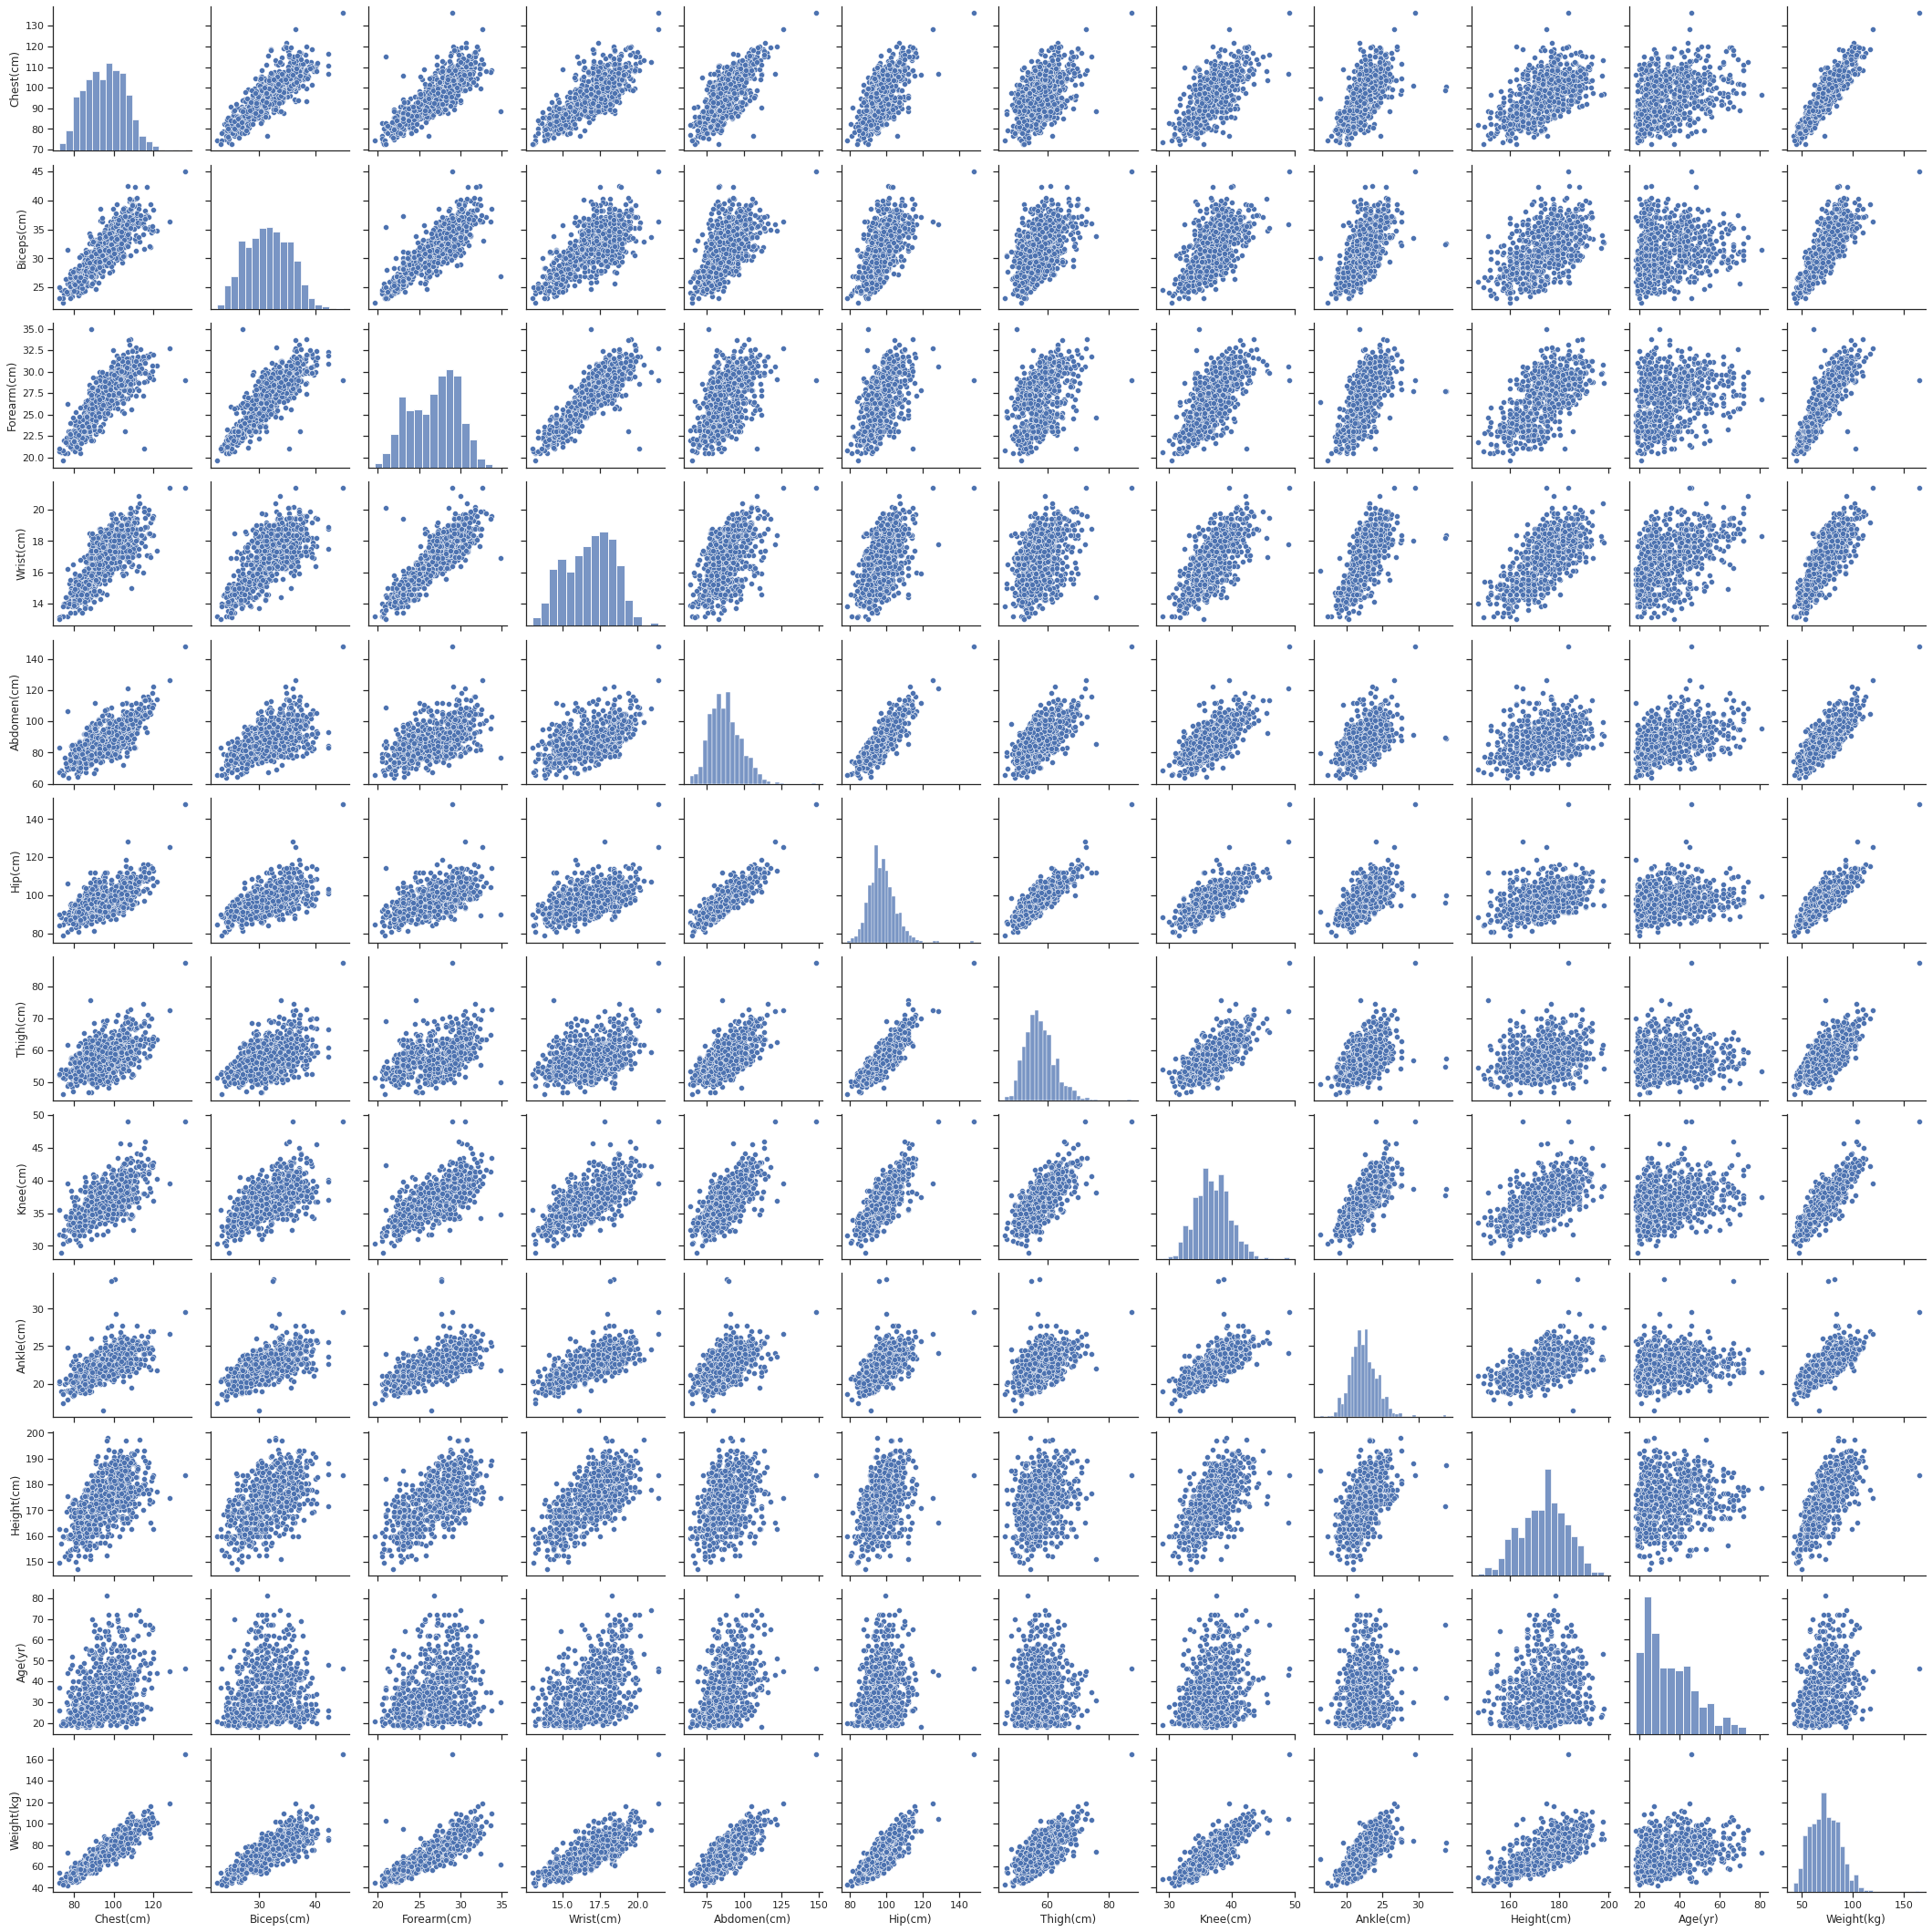

In [7]:
sns.pairplot(data)

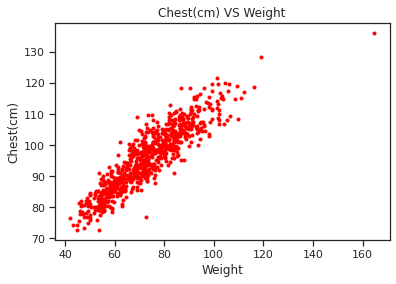

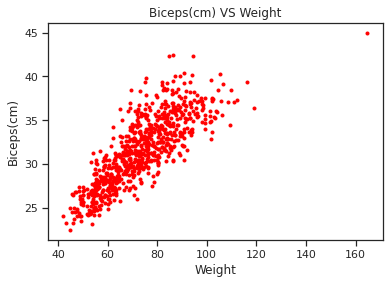

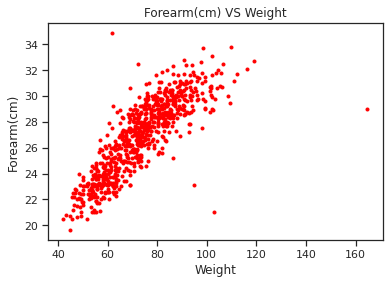

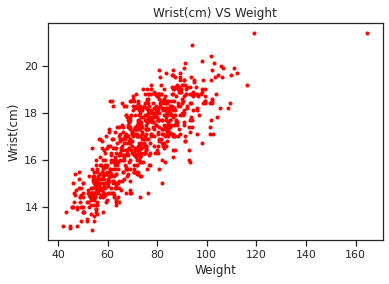

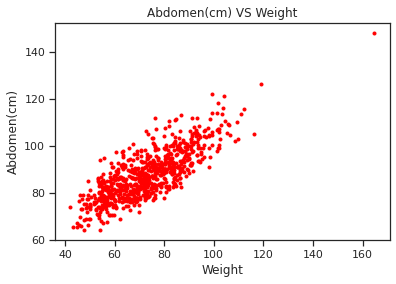

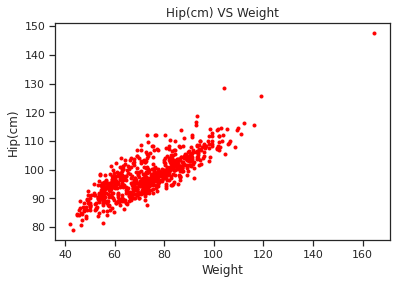

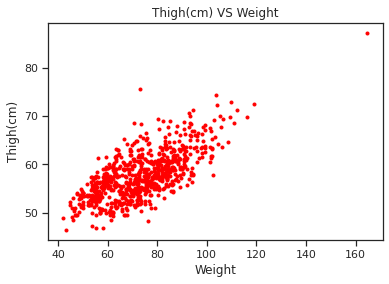

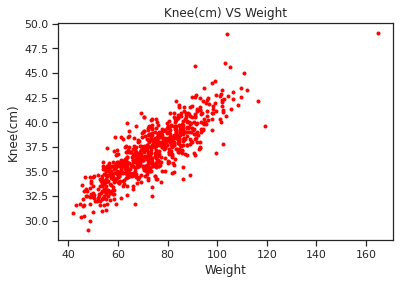

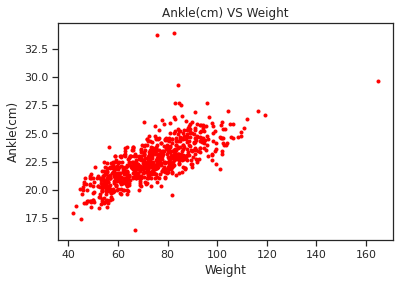

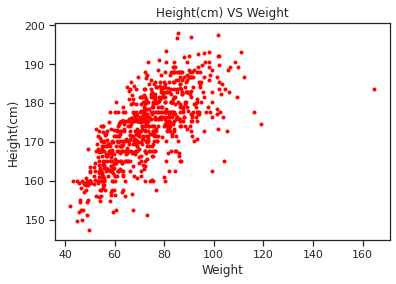

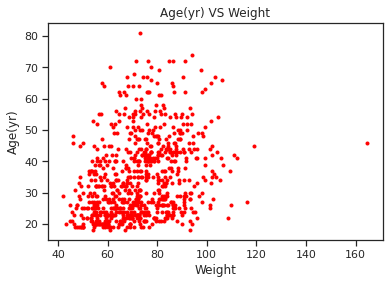

In [8]:
x = ['Chest(cm)', 'Biceps(cm)', 'Forearm(cm)', 'Wrist(cm)', 'Abdomen(cm)', 'Hip(cm)', 'Thigh(cm)', 'Knee(cm)', 'Ankle(cm)', 'Height(cm)', 'Age(yr)']
y = data['Weight(kg)']
for i in x:
    plt.figure()
    plt.scatter(y, data[i], marker='.', c=['red'])
    plt.ylabel(i)
    plt.xlabel("Weight")
    plt.title(f'{i} VS Weight')
    plt.show()

### after seeing the charts we conclude that Age has a very low impact or neglegible importance while predicting the weight. Hence, we dont consider the feature "Age(yr)" and remove it from the list of independent features (X)

#### But as considering the Age parameter add a little accuracy to the model we consider it



In [9]:
data.columns

Index(['Chest(cm)', 'Biceps(cm)', 'Forearm(cm)', 'Wrist(cm)', 'Abdomen(cm)',
       'Hip(cm)', 'Thigh(cm)', 'Knee(cm)', 'Ankle(cm)', 'Height(cm)',
       'Age(yr)', 'Weight(kg)'],
      dtype='object')

In [10]:
#data = data.drop('Age(yr)', axis = 1)

In [11]:
#data.columns

In [12]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape, y.shape)

(531, 11) (531,)
(228, 11) (228,)
(759, 11) (759,)


# Simple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 58.6658  57.83  ]
 [ 70.625   73.71  ]
 [ 68.9745  70.42  ]
 [ 88.265   87.8   ]
 [ 93.2232  98.2   ]
 [ 57.4847  59.2   ]
 [ 55.6532  55.    ]
 [ 72.767   71.8   ]
 [ 72.6401  70.    ]
 [ 75.174   73.2   ]
 [ 71.4336  76.4   ]
 [ 69.0839  65.9   ]
 [ 91.9753  95.48  ]
 [ 75.5216  71.    ]
 [ 89.04    87.3   ]
 [ 94.353   94.91  ]
 [ 84.6962  82.67  ]
 [ 37.1648  43.2   ]
 [ 82.9223  80.74  ]
 [ 49.0839  53.2   ]
 [ 96.2488  94.57  ]
 [ 56.9243  55.9   ]
 [ 55.4409  55.5   ]
 [ 52.42    54.    ]
 [ 85.0605  84.1   ]
 [ 96.9416  99.22  ]
 [ 49.21    48.6   ]
 [ 52.1873  57.    ]
 [ 66.0921  64.1   ]
 [ 58.0428  58.2   ]
 [ 92.0901  90.9   ]
 [ 61.0623  66.4   ]
 [ 48.8269  52.7   ]
 [ 60.4472  60.44  ]
 [ 83.5495  82.5   ]
 [ 82.397   81.8   ]
 [ 83.5855  84.37  ]
 [ 78.6101  80.2   ]
 [ 62.3836  62.    ]
 [ 86.3195  87.77  ]
 [ 54.9387  55.    ]
 [ 60.8501  55.9   ]
 [ 52.2289  52.7   ]
 [103.4919 103.31  ]
 [ 68.508   68.72  ]
 [ 55.0638  55.5   ]
 [ 63.8273  63.6   ]
 [ 55.1819  5

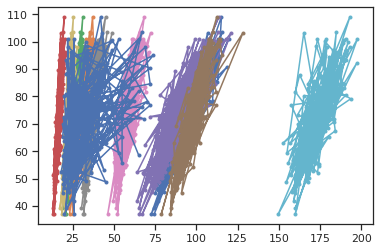

In [16]:
plt.plot(X_test, y_pred, marker=".")

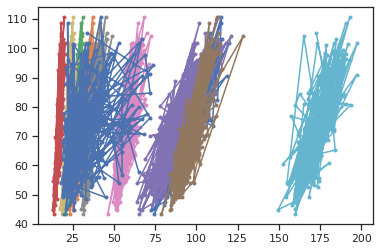

In [17]:
plt.plot(X_test, y_test, marker=".")

In [18]:
r2_score(y_test, y_pred)

0.9701795821247916

In [28]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

# DecissionTree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
y_pred2 = regressor2.predict(X_test)
r2_score(y_test, y_pred2)

0.8949968607979679

# Random Forest Regressor


In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
y_pred3 = regressor.predict(X_test)
r2_score(y_test, y_pred3)

0.9613453876837278

# Support vector regression


In [23]:
from sklearn.svm import SVR
regressor4 = SVR(kernel = 'rbf')
regressor4.fit(X_train, y_train)

SVR()

In [24]:
y_pred4 = regressor4.predict(X_test)

In [25]:
r2_score(y_test, y_pred4)

0.7937209106211001